![](https://i.imgur.com/JsMvGnP.png)


## Exercício de análise exploratória de dados

Neste projeto você irá realizar uma análise estatística de um dos dataset mais famosos da comunidade de Data Science, o dataset **Titanic**.

Esse dataset contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas a seguir.

O dataset disponibilizado tem quase a mesma estrutura de uma planilha do excel, com linhas e colunas. O tipo do arquivo é o CSV ou Comma-separated values, que seriam Valores Separados por Vírgula, porque é exatamente assim que ele funciona, você distingue que o valor pertence a diferentes colunas porque a vírgula está ali separando uns dos outros.

O objetivo deste projeto é você aplicar os principais conceitos que você aprendeu na unidade 6.
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
* pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* name = Nome do passageiro
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

### Carregando os dados

In [1]:
import pandas as pd

# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
dados = pd.read_csv('https://raw.githubusercontent.com/armandocesar/EDA-exercises/master/titanic.csv')

# Exibe o número de linhas e colunas
print(dados.shape)

# Exibe as 10 primeiras linhas
dados.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Qual foi a porcentagem dos passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [3]:
dados['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [5]:
dados['Survived'].value_counts(normalize=False)

0    549
1    342
Name: Survived, dtype: int64

### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?

In [7]:
min = dados['Age'].min()
max = dados['Age'].max()

In [8]:
print('De {} a {}'.format(min,max))

De 0.42 a 80.0


### 3. Qual porcentagem de homens e mulheres sobreviventes?

In [56]:
mulheres = dados[dados['Sex']=='female']['Survived'].value_counts()[1]/dados[dados['Sex']=='female']['Sex'].count()

In [57]:
homens = dados[dados['Sex']=='male']['Survived'].value_counts()[1]/dados[dados['Sex']=='male']['Sex'].count()

In [62]:
print('Mulheres: {} \nHomens: {}'.format(mulheres, homens))

Mulheres: 0.7420382165605095 
Homens: 0.18890814558058924


### 4. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](# Referência: http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

In [70]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
print('Qualitativa Nominal : Name, Survived, Sex, \nQualitativa Ordinal : plcass \nQuantitativa Discreta : \nQuantitativa Contínua : Age ')

Qualitativa Nominal : Name, Survived, Sex, 
Qualitativa Ordinal : plcass 
Quantitativa Discreta : 
Quantitativa Contínua : Age 


In [ ]:
# Resposta excluída propositalmente

### 5. Qual o tipo de classe de passagem mais frequente nos dados?

In [78]:
dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 6. Qual a média e desvio padrão do valor das passagens?

In [79]:
media = dados['Fare'].mean()
dp = dados['Fare'].std()

In [81]:
print('Média: {}\nDesvio Padrão: {}'.format(media,dp))

Média: 32.2042079685746
Desvio Padrão: 49.693428597180905


### 7. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

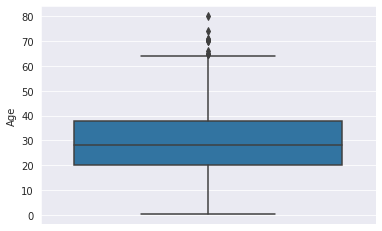

In [86]:
import seaborn as sns
sns.set_style('darkgrid')
sns.boxplot(y = dados['Age'])

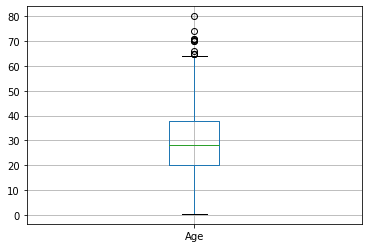

### 8. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?


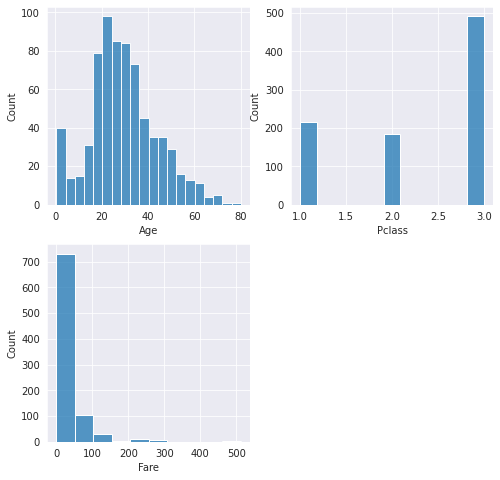

In [134]:
import matplotlib.pyplot as plt
import numpy as np

f, axes = plt.subplots(2, 2, figsize=(8,8), sharey=False, sharex=False)
a0,a1,a2, a3 = axes.flatten()

sns.histplot(dados['Age'], ax=a0)
sns.histplot(dados['Pclass'], ax=a1)
sns.histplot(dados['Fare'], bins=10, ax=a2)

f.delaxes(a3)